In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
# %matplotlib notebook

from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
# numpy built-in norm function

x = np.array([[3],[4]])

np.linalg.norm(x, 2)

5.0

In [3]:
x, y = np.array([[-2],[2]]), np.array([[4],[-3]])
x.T @ y

array([[-14]])

In [4]:
distance = np.linalg.norm(x-y,2)
distance

7.810249675906656

### Difference of squared distances. 
Determine whether the difference of the squared distancesto two fixed vectors c and d, defined as  

f(x)=∥x−c∥ −∥x−d∥ ,  

is linear, affine, or neither. If it is linear, give its inner product representation, i.e., an n-vector a for which f(x) = aTx for all x. If it is affine, give a and b for which f(x) = aT x + b holds for all x. If it is neither linear nor affine, give specific x, y, α, and β for which superposition fails, i.e.,
f(αx + βy) ̸= αf(x) + βf(y).  
(Provided α + β = 1, this shows the function is neither linear nor affine.)

In [159]:
# define c,d and x
# c and d are two fixed vector
c = np.array([[2],[4]])
d = np.array([[-1],[3]])


In [226]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
# Z = np.sqrt(XX**2 + YY**2)
Z = np.array(((X-c[0][0])**2 + (Y - c[1][0])**2) + ((X-d[0][0])**2 + (Y - d[1][0])**2))

In [227]:
X.shape, Y.shape

((40, 40), (40, 40))

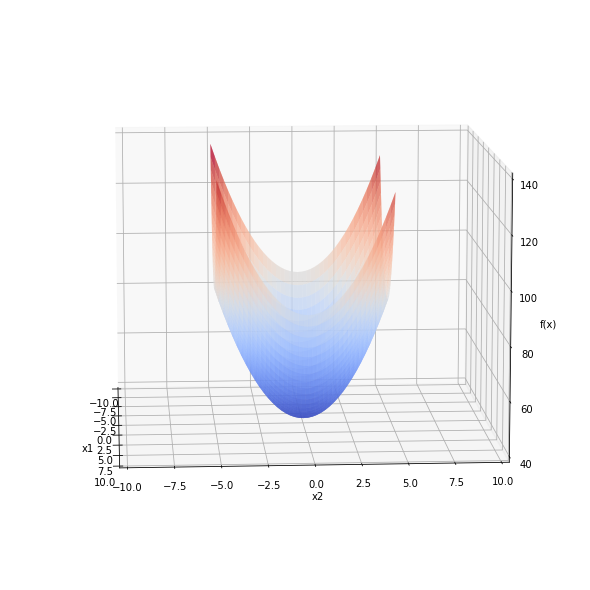

In [228]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-10,10)
plt.ylim(-10,10)

# surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

def init():
    ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
    return fig,
def animate(i):
    ax.view_init(elev=10, azim=3.6*i)
    return fig,
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
frames=100, interval=200, blit=True)    
HTML(ani.to_html5_video())

In [174]:
# Lets made norm(c) = norm(d)
c = np.array([[2],[4]])
d = np.array([[-2],[-4]])



X = np.arange(-3, 0.1, 0.25)
Y = np.arange(-3, 0.1, 0.25)

XX, YY = np.meshgrid(X, Y)
Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - ((XX-d[0][0])**2 + (YY - d[1][0])**2))

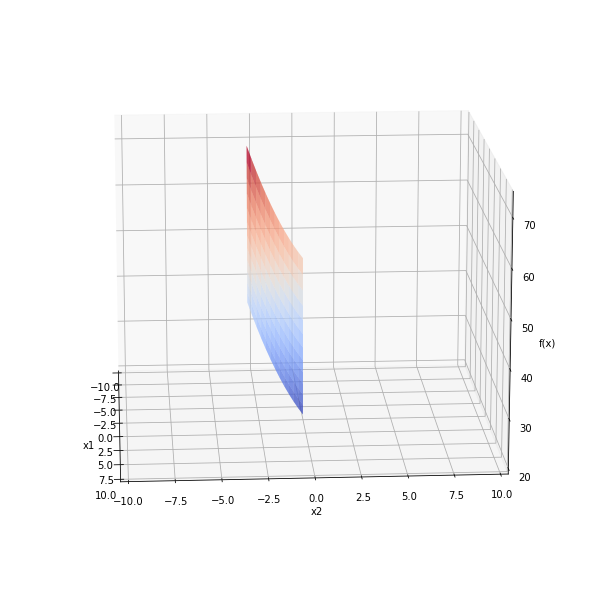

In [172]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-10,10)
plt.ylim(-10,10)

# surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')

def init():
    ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
    return fig,
def animate(i):
    ax.view_init(elev=15, azim=3.6*i)
    return fig,
# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
frames=100, interval=200, blit=True)    
HTML(ani.to_html5_video())

In [165]:
# # function which is difference of norm of (x-c)^2 and (x-d)^2

def fx(c,d, x):
    return (np.linalg.norm(x-c, 2)**2 - np.linalg.norm(x-d, 2)**2)

In [166]:
# The function works!!
x = np.array([[0],[0]])
fx(c,d, x)

0.0

In [233]:
# X and Y are two elements of x and Z is f(x)
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(X**2 + Y**2)
# Z = np.array(((XX-c[0][0])**2 + (YY - c[1][0])**2) - (XX-d[0][0])**2 + (YY - d[1][0])**2)

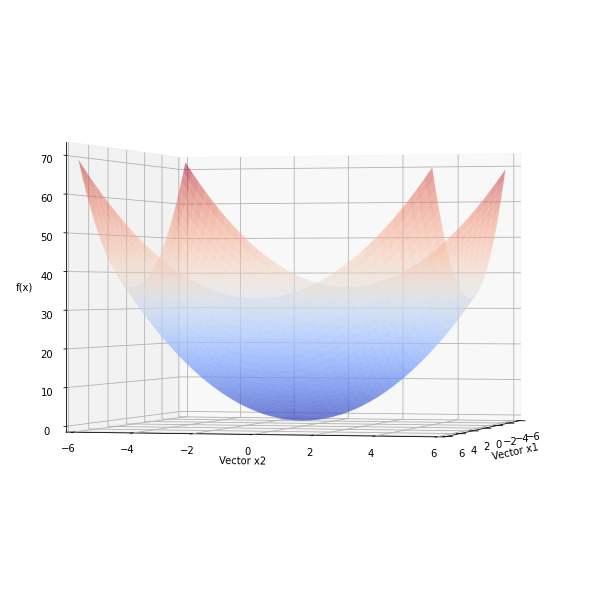

In [234]:
# plot the 3D animation to visualize if f(x) is affine or not
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(-6,6)
plt.ylim(-6,6)

surf = ax.plot_surface(X, Y, Z, alpha = 0.5,cmap=cm.coolwarm)
#                        linewidth=0, antialiased=False)
ax.set_xlabel('Vector x1')
ax.set_ylabel('Vector x2')
ax.set_zlabel('f(x)')

ax.view_init(elev=0, azim=15)

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

## Norms and Prediction Errors:


l1 norm = sum of magnitude of elements of a vector. Also know as Manhattan distance. Use case: Mean Absolute Error (MAE)

l2 norm = sum of square of vector elements. This is notion of distance we are familiar with (Euclidean distance). Use case: Root Mean Squared Error (RMSE).

l$\infty$ norm = largest absolute value in the vector.


### For a given vector:

### l$\infty$ > l2  > l1

This means MAE (l1) will never be higher than RMSE (l2) for a given vector. 

Also higher the norm index, more it focuses on larger value and neglects the smaller values in a vector  
    Ergo: RMSE (l2 norm) is more sensitive to outliers than the MAE (l1 norm). 
    

## Which one to use MAE or RMSE?

In many circumstances it makes sense to give more weight to points further away from the mean--that is, being off by 10 is more than twice as bad as being off by 5. In such cases RMSE is a more appropriate measure of error.

If being off by ten is just twice as bad as being off by 5, then MAE is more appropriate.  

The RMSE is more appropriate to represent model performance than the MAE when the error distribution is expected to be Gaussian (i.e. outliers are exponentially rare).


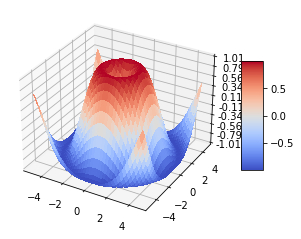

In [205]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
# Z = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [206]:
X.shape


(40, 40)

In [210]:
Y[3]

array([-4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25, -4.25,
       -4.25, -4.25, -4.25, -4.25])

In [202]:
a = np.arange(1, 5)
b = np.arange(5, 9)
x, y = np.meshgrid(a, b)

In [203]:
x

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [204]:
y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

### Nearest unit vector. What is the nearest neighbor of the n-vector x among the unit vectors e1,...,en?


In [4]:
x = np.array([[3],[2], [5], [7]])

In [13]:
e1 = np.array([[1], [0], [0], [0]])
e2 = np.array([[0], [1],[0],[0]])
e3 = np.array([[0], [0],[1],[0]])
e4 = np.array([[0], [0],[0],[1]])

In [6]:
distance1 = np.linalg.norm(x-e1,2)
distance1

9.055385138137419

In [7]:
distance2 = np.linalg.norm(x-e2,2)
distance2

9.16515138991168

In [8]:
distance3 = np.linalg.norm(x-e3,2)
distance3

8.831760866327848

In [9]:
distance4 = np.linalg.norm(x-e4,2)
distance4

8.602325267042628

### Interpret each unit vector as the axis for the cartesian coordinates. The vector will be closest to the axis for which x has max value

In [5]:
x = (0,5)
y = (0,10)
z = (0, 3)

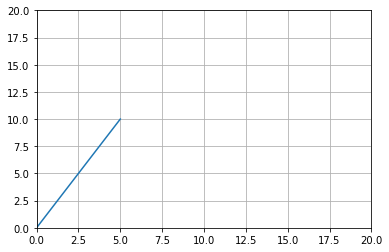

In [6]:

plt.xlim(0,20)
plt.ylim(0,20)
plt.grid(True)
plt.plot(x,y)
plt.show()

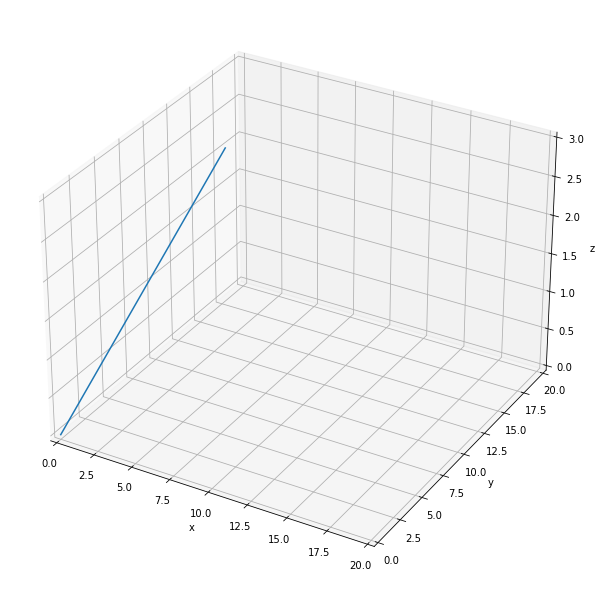

In [7]:
fig = plt.figure(figsize = (12,8))
ax = Axes3D(fig)
plt.xlim(0,20)
plt.ylim(0,20)



ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x, y, z)

## Look up the index for largest element in x. The unit vector with that index will be the closest unit vector

_____

## 3.15 Average, RMS value, and standard deviation. Use the formula (3.5) to show that for any vector x, the following two inequalities hold:
| avg(x)| ≤ rms(x), std(x) ≤ rms(x).  
Is it possible to have equality in these inequalities? If | avg(x)| = rms(x) is possible, give
the conditions on x under which it holds. Repeat for std(x) = rms(x).

rms(x)2 = avg(x)2 + std(x)2 

It seems like right angle triangle.   


Hypotenuse = RMS  
Adjacent sides are mean and std.  

Geometric proof:

https://upload.wikimedia.org/wikipedia/commons/a/a1/QM_AM_GM_HM_inequality_visual_proof.svg

# Visual Proof of inquality
![title](inequality_visual_proof.png)